In [1]:
%autosave 50

Autosaving every 50 seconds


# Basics

## Load Liberaries

In [2]:
import os
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import model_from_json 

## setup logger

In [3]:
from setup_basic_logger import setup_logger 
log=setup_logger(degree="INFO")

INFO:09:53:50 AM: logger <Logger test-logger (INFO)> has Disable::False


Help on function setup_logger in module setup_basic_logger:

setup_logger(degree, enable=True)
    setup a basic logger with degree=["DEBUG","INFO", "WARNING","ERROR"], 
    could be disable via 'enable' variable, default is enable



# Load the pre-trained model
- this model.json, model.h5 is meant for dog/cat classifier with around 85 % accuracy

In [4]:
## Example model.json and model.h5 could be found here: 
## /Users/psaxena/Documents/work_mode/ml_in_produdction/model
try:
    with open("/Users/psaxena/Documents/work_mode/ml_in_produdction/dog_cat_classifier/model/model.json",'r') as f:
        json = f.read()
except:
    log.error(f"{f} is not being read.")
    
loaded_model=model_from_json(json)
loaded_model.load_weights("/Users/psaxena/Documents/work_mode/ml_in_produdction/dog_cat_classifier/model/model.h5")
print("Loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded model from disk


2021-10-05 09:53:51.180080: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Predicting image

## via script

In [5]:
import sys
sys.path.append("../pool_common_scripts/")
from predict_local_image import predict_local_image_with_confidence_level

Help on function predict_local_image_with_confidence_level in module predict_local_image:

predict_local_image_with_confidence_level(image_name, image_target_size, model_name, output_class, show_image=True)
    Output the prediction:
     image_name= name of the jpf file in ~/Doc/weiterbildung/images_for_testing
     image_target_size: size of the image eg:(150,150)
     model_name = name of the model to make the prediction 
     output_class = array of two image classifier eg ["dog", "cat"]



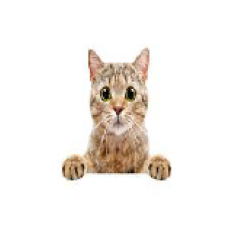

2021-10-05 09:54:23.640385: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


{'class': 'cat', 'confidence_level': 98.75}

In [8]:
name="cat_01.jpeg"
predict_local_image_with_confidence_level(image_name=name, 
                                          image_target_size=(150,150),
                                          model_name=loaded_model,
                                          output_class=['dog','cat'],
                                         )

## via function with confidencem

In [9]:
def load_image(img_path, img_target_size, show=False):
    img = image.load_img(img_path, target_size=img_target_size)
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

def predict_image_with_confidence_level(model_name, image_name, image_target_size):
    
    #img_path = 'test_images/' + image_name
    img_dir = "/Users/psaxena/Documents/weitebildung/images_for_testing/"
    img_path= img_dir+image_name
    
    if not os.path.exists(img_path):
        print(f"{img_path} does not exist")
        return
    
    # load a single image
    new_image = load_image(img_path, image_target_size, show=True)
    pred = model_name.predict(new_image)
    
    pred_class = "dog" if pred[0]>0.5 else "cat"
    confidence = (1-pred[0][0])*100 if pred_class=='cat' else pred[0][0]*100
    prediction = {'class':pred_class, 'confidence_level':confidence}
    return prediction

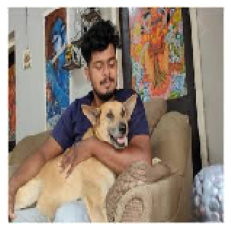

{'class': 'dog', 'confidence_level': 89.73811864852905}

In [10]:
predict_image_with_confidence_level(model_name=loaded_model, image_name="dog_07.jpeg", image_target_size=(150,150))

In [ ]:
predict_image_with_confidence_level(model_name=loaded_model, image_name="cat_07.jpeg", image_target_size=(150,150))

## via function w/o confidence

In [11]:
from matplotlib.pyplot import imread
from keras.preprocessing import image

def predict_local_image(model_name, image_name, show=False):
    img_dir = "/Users/psaxena/Documents/weitebildung/images_for_testing/"
    img_path = img_dir+ image_name
    
    if not os.path.exists(img_path):
        print(f"{img_path} does not exist")
        return
    
    img=image.load_img(img_path, target_size=(150, 150))
    if show:
        plt.imshow(img)
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model_name.predict(images, batch_size=20)
    
    prediction= "dog" if classes[0].any() else "cat"
    return prediction

'dog'

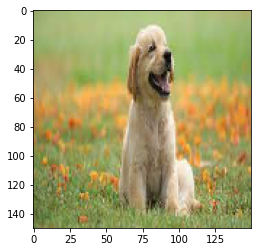

In [12]:
predict_local_image(model_name=loaded_model,image_name='dog_02.jpeg', show=True)